<a href="https://colab.research.google.com/github/chinmayAmbasht/phys-246-fa23/blob/main/Honors_Project_Quantum_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Honors Project: Quantum Monte Carlo: Variational
---

Name: Chinmay Ambasht

Date: 12.4.23

Supervised by: Prof. Bryan Clark

Aim of the project: I will be closely following along the tutorial provided by Prof. Bryan Clark on his website about Variational Monte Carlo which simulates properties of the Hydrogen atom


My goal for the honors project will be to make *a working simulation of Deuterium* which builds on the tutorial provided: https://clark.physics.illinois.edu/Tutorials/VMCIntroTutorial/index.html


## 0. Imports




In [ ]:
!wget https://clark.physics.illinois.edu/Tutorials/stats.py

--2023-12-14 22:33:24--  https://clark.physics.illinois.edu/Tutorials/stats.py
Resolving clark.physics.illinois.edu (clark.physics.illinois.edu)... 18.220.149.166
Connecting to clark.physics.illinois.edu (clark.physics.illinois.edu)|18.220.149.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1979 (1.9K)
Saving to: ‘stats.py’

stats.py            100%[===================>]   1.93K  --.-KB/s    in 0s      

2023-12-14 22:34:05 (728 MB/s) - ‘stats.py’ saved [1979/1979]



In [ ]:
import numpy as np
import scipy
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This is the statistics module provided in the tutorial: https://clark.physics.illinois.edu/Tutorials/stats.html


In [ ]:
import stats
myData = np.array([0.3,0.6,0.77,0.9])
myStats= stats.Stats(myData)
print ("Mean: ",myStats[0])
print ("Variance: ",myStats[1])
print ("Error: ",myStats[2])
print ("Autocorrelation time: ",myStats[3])

Mean:  0.6425
Variance:  0.05041875000000007
Error:  0.13999813986859497
Autocorrelation time:  1.5549357464567573


# I. Understanding the Variational Principle
---

## A. Introduction to  Variational Monte Carlo



Variational Monte Carlo is a method to evaluate the integral $\frac{ \int |\Psi(R)|^2 O(R) dR}{\int |\Psi(R)|^2} dR. $

To accomplish this, we use Markov Chain Monte Carlo. This works in the following manner:

1. Choose a new trial location for the particles
2. Evaluate the ratio squared of the wavefunctions for the new and old trial locations
3. If the ratio squared is greater then some random number, then keep the new trial location, otherwise keep the old trial location.

## B. Trial Wave Functions for a Hydrogen Molecule

We will be writing a simple variational monte carlo code to calculate the bond length of a Hydrogen molecule.
Note: You will need to be analyzing some data in this section. Make sure you are comfortable with the python statistical package we've supplied.
For sake of simplicity, this lab will focus on the hydrogen molecule. Since it has only two electrons (one spin up and one spin down), we need not be concerned with computing determinants. We will be optimizing two very simple trial wave functions $\Psi_1$ and $\Psi_2$. Let our molecule be centered at the origin with protons at $\pm L/2 \hat{x}$.

The first trial function is a simple bond-centered Gaussian with width controlled by the parameter $\alpha$, $\Psi(r_1,r_2;\alpha)=\exp[-\alpha(|r_1|^2+|r_2|^2)]$ where $\alpha$ is to be optimized variationally.

We will use as our data structure for storing the coordinates of the ions (electrons) to be a 2d numpy array. The first coordinate will be the particles and the second coordinate the coordinates. Therefore, to access the second particle, call coords[1] and to access the y element, call coords[1,1] (remember that in python, all arrays start counting from 0)

In [ ]:
def waveFunction(coords,ions):
  # your code here
  r1 = np.sum(coords[0]**2)
  r2 = np.sum(coords[1]**2)
  return np.exp(- 0.5 * (r1 + r2))
coords=np.array([[1.0,0.5,0.3],[-0.2,0.1,-0.1]])
ions = np.array([[-0.7,0.0,0.0],[0.7,0.0,0.0]])
print('The value of the wave function:',waveFunction(coords, ions))

The value of the wave function: 0.49658530379140947


### a. Building our Wave functions

Let's start by building a test for our wave function. We will use $\alpha=0.5$. What should wave function do? It takes the position of the ions, the position of the electrons and gives a number. Let us then define our test as

In [ ]:
def WaveFunction1_test1(wavefunction):
   coords=np.array([[1.0,0.5,0.3],[-0.2,0.1,-0.1]])
   ions=np.array([[-0.7,0.0,0.0],[0.7,0.0,0.0]])
   if np.abs(wavefunction(coords,ions) - 0.496585)<1e-5:
      return True
   else:
      return False

if (WaveFunction1_test1(waveFunction)):
   print ("Wavefunction Test passed")
else:
   print ("Wavefunction Test Failed")


Wavefunction Test passed


## C. Building a Monte Carlo Code

The next step in producing our Monte Carlo code, is to decide how we are going to move the particles. One natural (albeit not the best) approach to this is to simply move the particles in a small box around their current position. Let's start with this as our basic approach.

We are now ready to put everything together in our very first Monte Carlo code! In our first attempt, we will compute just one thing: the acceptance ratio of our moves. Observe that our basic process will be:

In [ ]:
def acceptanceRatio(coordsCopy, coords, ions, waveFunction):
  newWaveFunction = waveFunction(coordsCopy, ions) **2
  originalWaveFunction = waveFunction(coords, ions) ** 2
  return min(1, newWaveFunction / originalWaveFunction)

def VMC(WF,ions,numSteps):
  R=np.zeros((2, 3), float)
  movesAttempted=0.0
  movesAccepted=0.0
  for step in range(0,numSteps):
    coordsCopy = np.copy(WF)
    R = (np.random.random((2, 3)) - 0.5) * 1.5
    for ptcl in range(0, len(R)):
      movesAttempted += 1
      # make your move for particle "ptc1"
      coordsCopy[ptcl, :] = coordsCopy[ptcl, :] + R[ptcl]
    # decide if you accepted or rejected
      if acceptanceRatio(coordsCopy, coords, ions, waveFunction) > (np.random.rand() * 1.5):
        WF[ptcl,:] = np.copy(coordsCopy[ptcl, :])
        movesAccepted += 1
    # updated movesAttempted and movesAccepted
    # here you will compute other things in the next steps
  print ("Acceptance ratio: ", movesAccepted / movesAttempted)
  return
VMC(coords, ions, 1000)

Acceptance ratio:  0.3625


To check if you've correctly put together your VMC code, you should find that if you are moving the particle in a box of length 1.5 (in each direction) around its current position you will get an acceptance ratio of approximately 0.323.

## D. Computing the Density

Of course, we want our QMC code to compute something. In this section, we will learn how to compute the density in the bond direction. In the next section, we will work on computing the energy. The energy will lead us into a variety of interesting questions about opimization, measuring bond-lengths, etc.

The key to computing the density in the x direction is to build up histogram. This is a good time to learn something about doing object oriented programing in python. In object oriented programming, you define a class. A class is essentially a group of functions and data that are put together so that the functions can access the data without them being part of it's arguments. Let's define a

In [ ]:
class Histogram:
    def Init(self, startPoint, endPoint,numPoints):
      #here we will write code to set up our class.
      self.startPoint = startPoint
      self.endPoint = endPoint
      self.numPoints = numPoints
      self.bin_edges = np.linspace(startPoint, endPoint, numPoints + 1)
      self.myData = np.zeros(numPoints, dtype = 'float')
    def Add(self,data):
      #add some code here
      self.myData += np.histogram(data, bins=self.bin_edges)[0]

    def Plot(self):
      # let's just plot the histogram
      plt.plot(self.bin_edges[:-1], self.myData)
      plt.xlabel('X')
      plt.ylabel('Y')
      #plt.title('Histogram')
      plt.show()

We can test our histogram by using the following piece of code:

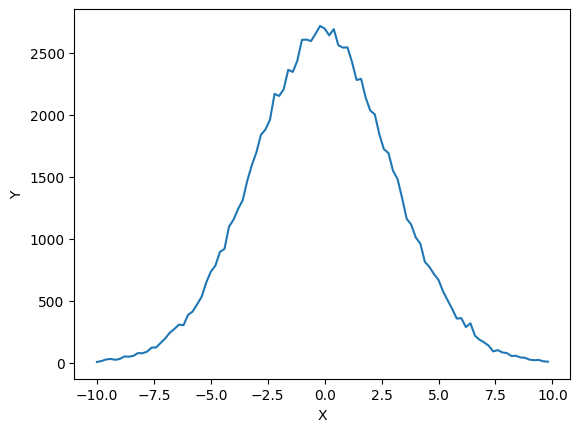

In [ ]:
myHist=Histogram()
myHist.Init(-10, 10, 100)
sigma= 3.0
randNums= np.random.randn(100000)*sigma
for r in randNums:
    myHist.Add(r)
myHist.Plot()

This should produce a gaussian curve with a standard deviation of 3.0. Check to make sure this is the case before going on! Now, use your histogram class to compute the density in the direction of the hydrogen molecules bond. You should expect to see something like this (if you make enough VMC steps!):

<img src = 'https://clark.physics.illinois.edu/Tutorials/VMCIntroTutorial/Hydrogen_wf1_bond.jpg' width = 300 align = 'center'>

In [ ]:
# Answer me

# The definition of wave function
def waveFunction(coords,ions):
  # your code here
  r1 = (coords[0, 0]**2 + coords[0, 1]**2 + coords[0, 2]**2)
  r2 = (coords[1, 0]**2 + coords[1, 1]**2 + coords[1, 2]**2)
  return np.exp(- 0.5 * (r1 + r2))
coords=np.array([[1.0,0.5,0.3],[-0.2,0.1,-0.1]])
ions = np.array([[-0.7,0.0,0.0],[0.7,0.0,0.0]])
#print('The value of the wave function:',waveFunction(coords, ions))

#The acceptance ratio for the Monte Carlo simulation
def acceptanceRatio(coordsCopy, coords, ions, waveFunction):
  newWaveFunction = waveFunction(coordsCopy, ions) **2
  originalWaveFunction = waveFunction(coords, ions) ** 2
  return min(1, newWaveFunction / originalWaveFunction)

#Monte Carlo Simulation
def VMC(WF,ions,numSteps):
  #R=np.zeros((2, 3), float)
  movesAttempted=0.0
  movesAccepted=0.0
  electron_positions = []
  for step in range(0,numSteps):
    coordsCopy = np.copy(WF)
    R = (np.random.random((2, 3)) - 0.5) * 1.5
    for ptcl in range(0, len(R)):
      movesAttempted += 1
      # make your move for particle "ptc1"
      coordsCopy[ptcl, :] = coordsCopy[ptcl, :] + R[ptcl]
    # decide if you accepted or rejected
      if acceptanceRatio(coordsCopy, coords, ions, waveFunction) > (np.random.rand() * 1.5):
        #WF[ptcl, :] = np.copy(coordsCopy[ptcl, :])
        WF[ptcl,:] = np.copy(coordsCopy[ptcl, :])
        movesAccepted += 1
      electron_positions.append(coordsCopy[ptcl, 0])
    # updated movesAttempted and movesAccepted
    # here you will compute other things in the next steps
  #print ("Acceptance ratio: ", movesAccepted / movesAttempted)
  return electron_positions

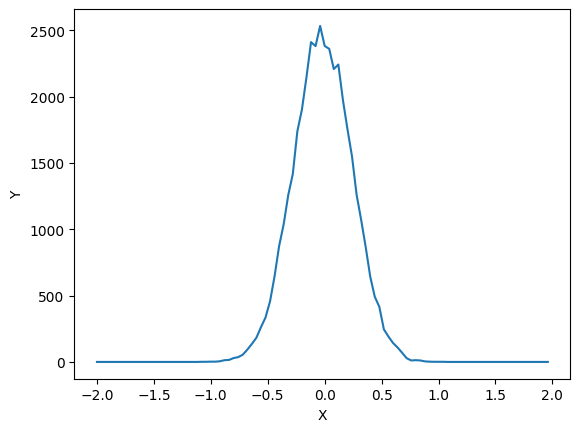

In [ ]:
coords=np.array([[1.0,0.5,0.3],[-0.2,0.1,-0.1]])
ions = np.array([[-0.7,0.0,0.0],[0.7,0.0,0.0]])


def waveFunction(coords,ions):
  # your code here
  r1 = (coords[0, 0]**2 + coords[0, 1]**2 + coords[0, 2]**2)
  r2 = (coords[1, 0]**2 + coords[1, 1]**2 + coords[1, 2]**2)
  return np.exp(- 0.5 * (r1 + r2))

densityWaveFunction = Histogram()
densityWaveFunction.Init(-2, 2, 100)
positions = []

for i in range(10):
  psiSquare = VMC(coords, ions, 20000)
  positions.append(psiSquare)

positions = np.array(positions)
#+mean_array = np.mean(positions, axis = 0)

mean_array = np.mean(positions, axis = 0)
for m in mean_array:
  densityWaveFunction.Add(m)
densityWaveFunction.Plot()

## E. Computing the Local Energy

One of the most important quantities in quantum Monte Carlo is the average energy. The average energy is defined as $\langle H\Psi / \Psi \rangle \equiv \langle E_L \rangle.$ Therefore, we need to compute the local energy $E_L$.

Recall that $\frac{H\Psi}{\Psi} = \frac{(-\nabla^2/2 + V)\Psi}{\Psi}$. The $(V\Psi)/\Psi$ term is relatively easy to evaluate as it just reduces to $V(r)=-\sum_{Ie} \frac{1}{r_{Ie}} + \sum_{ee} \frac{1}{r_{ee}}+\sum_{II}\frac{1}{r_{II}}$ (for a system of electrons (e) and Ions (I)).

While in a real code, we would want have analytic derivatives for the $\nabla^2 \Psi / \Psi$ term, in this tutorial we will focus on just computing it with finite differences (in any case, it's important to have it computed with finite differences to check your analytic derivatives). Let's add a function, then, that takes a wavefunction, and a coordinate array and then returns the kinetic energy component of the local energy. In other words, implement the functions

Remember that $\frac{\partial^2 F}{\partial x^2} \approx \frac{F(x+\delta)+F(x-\delta)-2F(x)}{\delta^2}$

In [ ]:
# second derivative helper function
def SecondDerivative(waveFunction, coords, coordinate, ptcl):
    step = 0.01
    waveFunction_og = waveFunction(coords, ions)

    if coordinate == 'x':
        coord_new_plus = np.copy(coords)
        coord_new_plus[ptcl , 0] = coord_new_plus[ptcl , 0] + step
        waveFunction_plus = waveFunction(coord_new_plus, ions)

        coord_new_minus = np.copy(coords)
        coord_new_minus[ptcl, 0] = coord_new_minus[ptcl, 0] - step
        waveFunction_minus = waveFunction(coord_new_minus, ions)

    elif coordinate == 'y':
        coord_new_plus = np.copy(coords)
        coord_new_plus[ptcl, 1] = coord_new_plus[ptcl, 1] + step
        waveFunction_plus = waveFunction(coord_new_plus, ions)

        coord_new_minus = np.copy(coords)
        coord_new_minus[ptcl, 1] = coord_new_minus[ptcl, 1] - step
        waveFunction_minus = waveFunction(coord_new_minus, ions)

    elif coordinate == 'z':
        coord_new_plus = np.copy(coords)
        coord_new_plus[ptcl, 2] = coord_new_plus[ptcl, 2] + step
        waveFunction_plus = waveFunction(coord_new_plus, ions)

        coord_new_minus = np.copy(coords)
        coord_new_minus[ptcl, 2] = coord_new_minus[ptcl, 2] - step
        waveFunction_minus = waveFunction(coord_new_minus, ions)

    return (waveFunction_plus - 2 * waveFunction_og + waveFunction_minus) / step**2


In [ ]:
# Energy functions
def potentialPsiOverPsi(wavefunction, coords, ions):
  # This returns the potential energy contribution
    # Electron-ion contributions
    ei_contrib = (np.sum(1 / np.sqrt(np.sum((coords - ions[0])**2, axis=1))) + np.sum(1 / np.sqrt(np.sum((coords - ions[1])**2, axis=1)))) * -1
    # Electron-electron contributions (include charge factor)
    ee_contrib = 1 / np.linalg.norm(coords[0] - coords[1])  # assuming charge is 1
    # Ion-ion contributions (include charge factor)
    ii_contrib = 1 / np.linalg.norm(ions[0] - ions[1])  # assuming charge is 1

    total_potential = ei_contrib + ee_contrib + ii_contrib

    return total_potential

def LaplacianPsiOverPsi(wavefunction, coords, ions):
  #this should return the kinetic piece of the local energy
  delX, delY, delZ = 0., 0., 0.
  for i in range(2):
    delX += SecondDerivative(wavefunction, coords, 'x', i)
    delY += SecondDerivative(wavefunction, coords, 'y', i)
    delZ += SecondDerivative(wavefunction, coords, 'z', i)
  return - 0.5 * ((delX + delY + delZ) / wavefunction(coords, ions))

def LocalEnergy(wavefunction, coords, ions):
  # this should return the local energy
  return LaplacianPsiOverPsi(wavefunction, coords, ions) + potentialPsiOverPsi(wavefunction, coords, ions)

To verify that your code is correct, set your ions so that the bond length is 1.4 and set the coordinates via

In [ ]:
R = np.zeros((2,3),float)
R[0]= [1.0,0.3,0.2]
R[1]= [2.0,-0.2,0.1]
ions = ions = np.array([[-0.7,0.0,0.0],[0.7,0.0,0.0]])

You should end up with the total local energy being -1.819

In [ ]:
print('The local energy of the system is:', LocalEnergy(waveFunction, R, ions))

The local energy of the system is: -1.8195071395569036


Now add the calculation of the local energy to your VMC function. Have the VMC function return a list of energies. Once you have these energies, use the statitistical package to compute the energy and error as well as plotting the energies.

You should end up seeing a plot like:

<img src = 'https://clark.physics.illinois.edu/Tutorials/VMCIntroTutorial/spikyEnergy.jpg' width = 300>

You should notice a couple things about this plot

1. It is quite spiky.
2. If you compute the statistics of your energy list, your answer is around -0.86.
3. Your variance is large.

In [ ]:
#The acceptance ratio for the Monte Carlo simulation
def acceptanceRatio(coordsCopy, coords, ions, waveFunction):
  newWaveFunction = waveFunction(coordsCopy, ions) **2
  originalWaveFunction = waveFunction(coords, ions) ** 2
  return min(1, newWaveFunction / originalWaveFunction)

#Updated Monte Carlo Simulation
def VMC(WF,ions,numSteps):
  #R=np.zeros((2, 3), float)
  movesAttempted=0.0
  movesAccepted=0.0
  electron_positions = []
  energy_list = []
  for step in range(0,numSteps):
    coordsCopy = np.copy(WF)
    R = (np.random.random((2, 3)) - 0.5) * 1.5
    for ptcl in range(0, len(R)):
      movesAttempted += 1
      # make your move for particle "ptc1"
      coordsCopy[ptcl, :] = coordsCopy[ptcl, :] + R[ptcl]
    # decide if you accepted or rejected
      if acceptanceRatio(coordsCopy, coords, ions, waveFunction) > (np.random.rand() * 1.5):
        #WF[ptcl, :] = np.copy(coordsCopy[ptcl, :])
        WF[ptcl,:] = np.copy(coordsCopy[ptcl, :])
        movesAccepted += 1
        electron_positions.append(coordsCopy[ptcl, 0])
    energy_list.append(LocalEnergy(waveFunction, WF, ions))
    # updated movesAttempted and movesAccepted
    # here you will compute other things in the next steps
  #print ("Acceptance ratio: ", movesAccepted / movesAttempted)
  return electron_positions, energy_list

Here are the statistics for a single run of the Variational Monte Carlo:

In [ ]:
coords=np.array([[1.0,0.5,0.3],[-0.2,0.1,-0.1]])
ions = np.array([[-0.7,0.0,0.0],[0.7,0.0,0.0]])


_, energies = VMC(coords , ions, 20000)
energyArr = np.array(energies)
energyStats= stats.Stats(energyArr)

print ("Mean: ",energyStats[0])
print ("Variance: ",energyStats[1])
print ("Error: ",energyStats[2])
print ("Autocorrelation time: ",energyStats[3])

Mean:  -0.841911270963148
Variance:  1.6103066285399292
Error:  0.022701407882319
Autocorrelation time:  6.400693019647921


Text(0, 0.5, 'Energy(in Hartrees)')

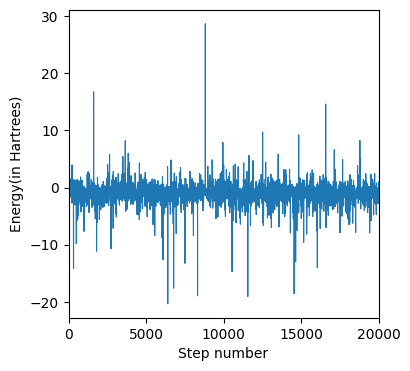

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(energyArr, linewidth = 0.8)
#ax.set_ylim(energyArr.min() - 10, 80)
ax.set_xlim(0, 20000)
ax.set_xlabel('Step number')
ax.set_ylabel('Energy(in Hartrees)')

The statistics of the energies over a number of Monte Carlo Runs is:

In [ ]:
energiesSim = []
for i in range(10):
  _, energyList = VMC(coords, ions, 20000)
  energiesSim.append(energyList)
energiesSim = np.array(energiesSim)
mean_energy_array = np.mean(energiesSim, axis = 0)

In [ ]:
energyStats= stats.Stats(mean_energy_array)

print ("Mean: ",energyStats[0])
print ("Variance: ",energyStats[1])
print ("Error: ",energyStats[2])
print ("Autocorrelation time: ",energyStats[3])

Mean:  -0.8409317888913196
Variance:  0.2621355988866213
Error:  0.008442148251927987
Autocorrelation time:  5.437633607204672


Text(0, 0.5, 'Energy(in Hartrees)')

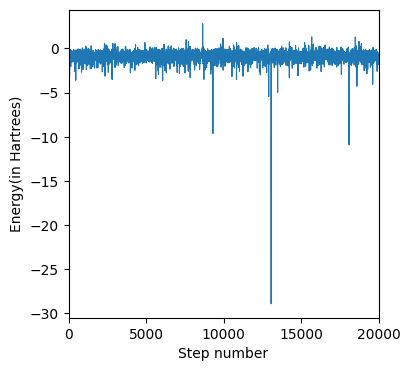

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(mean_energy_array, linewidth = 0.8)
ax.set_xlim(0, 20000)
ax.set_xlabel('Step number')
ax.set_ylabel('Energy(in Hartrees)')

## F. Classes All Around

Let's take stock of where we are. We have the functions


```
psi(coords,ions)
 LaplacianPsiOverPsi(wavefunction,coords,ions)
 LocalEnergy(wavefunction,coords,ions)
```

Currently $\alpha$ is hard coded into these wavefunctions, but in a minute we will want to vary it! This means that we either have to make $\alpha$ a global variable (ugly!), add another parameter alpha to all these functions, or bundle the wave functions into a class. The latter of these is the most elegant solution. Imagine we define the following class:

In [ ]:
class WaveFunctionClass:
  #wave function
  def psi(self,coords):
    ions = self.ions
    alpha = self.alpha
    r1 = np.sum(coords[0]**2)
    r2 = np.sum(coords[1]**2)
    return np.exp(- alpha * (r1 + r2))

  def SecondDerivative(self, waveFunction, coords, coordinate, ptcl):
    step = 0.01
    waveFunction_og = waveFunction(coords)

    if coordinate == 'x':
        coord_new_plus = np.copy(coords)
        coord_new_plus[ptcl , 0] = coord_new_plus[ptcl , 0] + step
        waveFunction_plus = waveFunction(coord_new_plus)

        coord_new_minus = np.copy(coords)
        coord_new_minus[ptcl, 0] = coord_new_minus[ptcl, 0] - step
        waveFunction_minus = waveFunction(coord_new_minus)

    elif coordinate == 'y':
        coord_new_plus = np.copy(coords)
        coord_new_plus[ptcl, 1] = coord_new_plus[ptcl, 1] + step
        waveFunction_plus = waveFunction(coord_new_plus)

        coord_new_minus = np.copy(coords)
        coord_new_minus[ptcl, 1] = coord_new_minus[ptcl, 1] - step
        waveFunction_minus = waveFunction(coord_new_minus)

    elif coordinate == 'z':
        coord_new_plus = np.copy(coords)
        coord_new_plus[ptcl, 2] = coord_new_plus[ptcl, 2] + step
        waveFunction_plus = waveFunction(coord_new_plus)

        coord_new_minus = np.copy(coords)
        coord_new_minus[ptcl, 2] = coord_new_minus[ptcl, 2] - step
        waveFunction_minus = waveFunction(coord_new_minus)

    return (waveFunction_plus - 2 * waveFunction_og + waveFunction_minus) / step**2
  def LaplacianPsiOverPsi(self,coords):
    ions = self.ions
    delX, delY, delZ = 0., 0., 0.
    for i in range(2):
      delX += self.SecondDerivative(self.psi, coords, 'x', i)
      delY += self.SecondDerivative(self.psi, coords, 'y', i)
      delZ += self.SecondDerivative(self.psi, coords, 'z', i)
    return - 0.5 * ((delX + delY + delZ) / self.psi(coords))

  def PotentialPsiOverPsi(self, coords):
      alpha = self.alpha
      ions = self.ions
      # This returns the potential energy contribution
      # Electron-ion contributions
      ei_contrib = (np.sum(1 / np.sqrt(np.sum((coords - ions[0])**2, axis=1))) + np.sum(1 / np.sqrt(np.sum((coords - ions[1])**2, axis=1)))) * -1
      # Electron-electron contributions (include charge factor)
      ee_contrib = 1 / np.linalg.norm(coords[0] - coords[1])  # assuming charge is 1
      # Ion-ion contributions (include charge factor)
      ii_contrib = 1 / np.linalg.norm(ions[0] - ions[1])  # assuming charge is 1

      total_potential = ei_contrib + ee_contrib + ii_contrib
      return total_potential
  def LocalEnergy(self , coords):
    return self.LaplacianPsiOverPsi(coords) + self.PotentialPsiOverPsi(coords)
  def SetIons(self,ions):
    self.ions = ions
  def SetAlpha(self,alpha):
    self.alpha = alpha

Notice, that we don't have to pass around as many things (like alpha and the ions) and we still get away with not have ugly global variables. Of course, this means that you're going to have to play around with some of the function calls and such that you have in your code so far. Go ahead and make the changes in your code necessary to be using this class. (Looking through the section "Computing the density" is probably helpful now)

You should be able to test your modifications to your class with the following code (which should work if you have only the HistogramClass and the WaveFunctionClass in your file!):

In [ ]:
import stats
wf=WaveFunctionClass()
wf.SetIons(np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]]))
wf.SetAlpha(0.5)
print ("Psi should be 0.496585 when given coords as numpy.array ([[1.0,0.5,0.3],[-0.2,0.1\
,-0.1]) and is:  ",wf.psi(np.array([[1.0,0.5,0.3],[-0.2,0.1,-0.1]])))
R=np.zeros((2,3),float)
R[0]=[1.0,0.3,0.2]
R[1]=[2.0,-0.2,0.1]
print  ("The local energy should be -1.819 and is: ",wf.LocalEnergy(R))


Psi should be 0.496585 when given coords as numpy.array ([[1.0,0.5,0.3],[-0.2,0.1,-0.1]) and is:   0.49658530379140947
The local energy should be -1.819 and is:  -1.8195071395569036


Modifying the Monte Carlo code to accomodate the WaveFunction Class

In [ ]:
#The acceptance ratio for the Monte Carlo simulation
def acceptanceRatio(coordsCopy, coords, ions, waveFunction):
  newWaveFunction = waveFunction(coordsCopy) **2
  originalWaveFunction = waveFunction(coords) ** 2
  return min(1, newWaveFunction / originalWaveFunction)

#Updated Monte Carlo Simulation
def VMC(wf, WF, numSteps, printV):
  #R=np.zeros((2, 3), float)
  waveFunction = wf.psi
  movesAttempted=0.0
  movesAccepted=0.0
  electron_positions = []
  energy_list = []
  for step in range(0,numSteps):
    coordsCopy = np.copy(WF)
    R = (np.random.random((2, 3)) - 0.5) * 1.5
    for ptcl in range(0, len(R)):
      movesAttempted += 1
      # make your move for particle "ptc1"
      coordsCopy[ptcl, :] = coordsCopy[ptcl, :] + R[ptcl]
    # decide if you accepted or rejected
      if acceptanceRatio(coordsCopy, coords, ions, waveFunction) > (np.random.rand() * 1.5):
        #WF[ptcl, :] = np.copy(coordsCopy[ptcl, :])
        WF[ptcl,:] = np.copy(coordsCopy[ptcl, :])
        movesAccepted += 1
        electron_positions.append(coordsCopy[ptcl, 0])
        energy_list.append(wf.LocalEnergy(WF))
    # updated movesAttempted and movesAccepted
    # here you will compute other things in the next steps
  if printV == True:
    print ("Acceptance ratio: ", movesAccepted / movesAttempted)
  return electron_positions, energy_list




To compute the average of multiple monte carlo simulations,

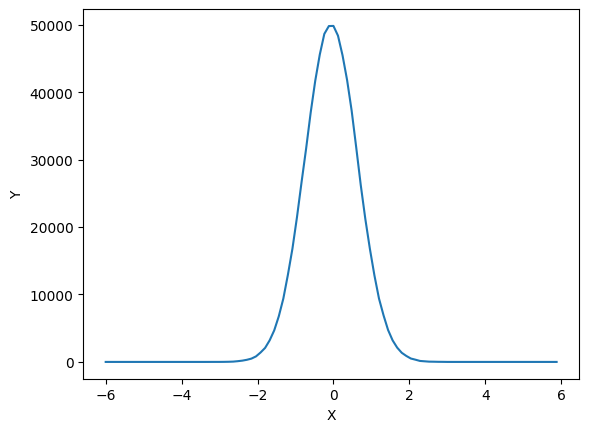

In [ ]:
densityWaveFunction = Histogram()
densityWaveFunction.Init(-6, 6, 100)

positions = []
for i in range(100):
  psiSquare, _ = VMC(wf,coords, 10000, False)
  for p in psiSquare:
    densityWaveFunction.Add(p)

densityWaveFunction.Plot()

In [ ]:
print ("The acceptance ratio of this VMC run should be about 0.323 and plot the density \
as above")
_,energy = VMC(wf, coords, 10000, printV = True)
myStats=stats.Stats(np.array(energy))
print ("Your statistics should be approximately  (-0.885, 1.325, 0.028, 5.613)",myStats)

The acceptance ratio of this VMC run should be about 0.323 and plot the density as above
Acceptance ratio:  0.36385
Your statistics should be approximately  (-0.885, 1.325, 0.028, 5.613) (-0.8329386603649555, 1.3623324599417415, 0.028350609312434702, 4.293327960017407)


Now, we have learned how to compute integrals using Variational Monte Carlo. Often, though, we don't know what our wave function actually is (in this case, we don't know what the correct value of $\alpha$ is). In the next section, we will use the variational principle to select the best value of the paramaters. Once we've started learning how to optimize, then we can afford to make our wave function more complicated!

# II. Optimizing using the Variational Principle
---

## A. Optimizing the wavefunction: A First Attempt

Now that we can evaluate the energy, we should use this information to choose more effective wavefunctions. (Remember the the typical VMC process involves an inner loop that computes an integral and an outer loop).

Now, we want to choose the best α given a specific bond dimension.

The simplest thing we can imagine doing is simply march along α in a given direction until we find the minimum value. Let us then write a function Optimize with a structure like:

In [ ]:
def Optimize(wf):
    optimizeList=[]
    alphaInit = wf.alpha
    alphas = np.arange(1/3 * alphaInit, 2 * alphaInit, 0.04)
    for alpha in alphas:
      wf.SetAlpha(alpha)
      _,energyList = VMC(wf, coords, 10000, False)
      myStats = stats.Stats(np.array(energyList))
      energy = myStats[0]
      error = myStats[2]
      optimizeList.append(np.array([alpha,energy,error]))
    optimizeList = np.array(optimizeList)
    bestAlpha = optimizeList[np.argmin(optimizeList[:, 1]), 0]
    return (optimizeList, bestAlpha)

Then we can test it like so:

In [ ]:
wf=WaveFunctionClass()
wf.SetIons(np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]]))
wf.SetAlpha(0.3) # this is your initial guess at an alpha
(optimizeData, bestAlpha) = Optimize(wf)
print ("The optimum alpha is ",bestAlpha)

The optimum alpha is  0.25999999999999995


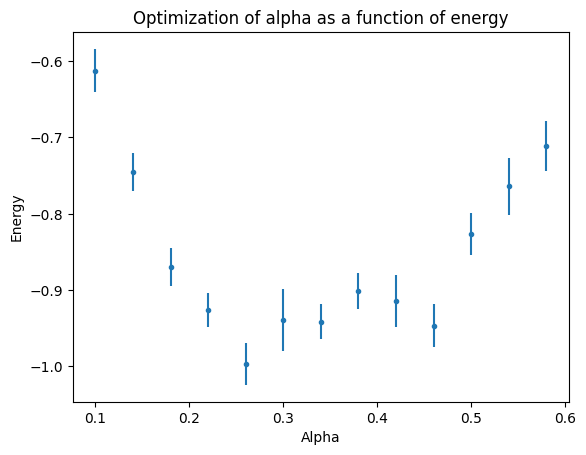

In [ ]:
plt.errorbar(optimizeData[:,0],optimizeData[:,1],optimizeData[:,2],fmt='.')
plt.xlabel('Alpha')
plt.ylabel('Energy')
plt.title('Optimization of alpha as a function of energy')
plt.show()

## B. Calculating the bond length and the vibrational energy: Attempt 1

Before beginning this section, make sure you have a code from the previous section that gives an optimum value of \alpha given a wavefunction.

We now want to calculate the bond length of our system. In order to calculate the vibrational energy and the average bond length, we will evaluate the energy at a variety of different bond lengths with this fixed optimized value of alpha (in a moment we will do something better). Write a function

In [ ]:
def BondLength(wf):
  bondLengths = np.arange(0.2, 4.0, 0.1)
  alphaInit = wf.alpha
  bondList=[]
  #write stuff here
  for bondLength in (bondLengths / 2):
      wf.SetIons(np.array([[-bondLength, 0., 0.], [bondLength, 0., 0.]]))
      _, energyList = VMC(wf, coords, 10000, False)
      myStats = stats.Stats(np.array(energyList))
      energy = myStats[0]
      error = myStats[2]
      bondList.append([bondLength * 2,energy,error])
  bondList = np.array(bondList)
  optimum_bondLength = bondList[np.argmin(bondList[:, 1]), 0]
  return (optimum_bondLength,bondList)


The results of running the optimize bond length function once,

In [ ]:
wf=WaveFunctionClass()
wf.SetIons(np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]]))
wf.SetAlpha(0.3)
(optimum_bondLength, bondList) = BondLength(wf)
print('The optimum bond length is', optimum_bondLength / 2)

The optimum bond length is 0.7000000000000002


We will now call it using

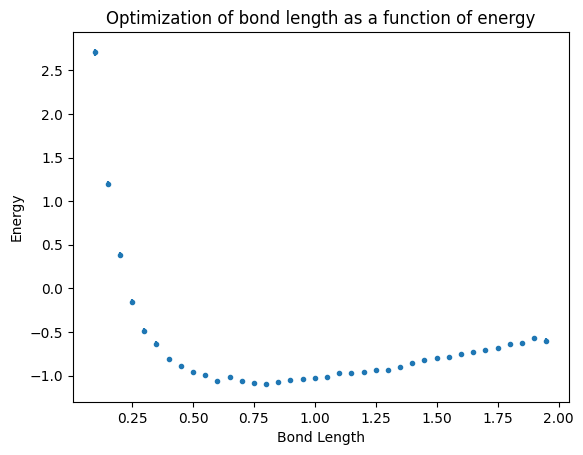

In [ ]:
plt.errorbar(bondList[:,0] / 2,(bondList[:,1]),bondList[:,2],fmt='.')
plt.xlabel('Bond Length')
plt.ylabel('Energy')
plt.title('Optimization of bond length as a function of energy')
plt.show()

which should give us our answer and plot the values.

Let's now improve on this. Ideally we want the value of alpha to be optimized for each independent bond length. You should be able to couple your two functions (Optimize, BondLength) If you haven't sped up your alpha optimization up yet, this might turn out to be a little slow. Another option is to replace your calls to VMC with a call to fast.VMC which is a version of VMC we've written that does exactly what yours does (but is written in C++ and so is an order of magnitude faster). See here for a discussion of python and speed. You may notice that the minimum bond length is reasonably good. On the other hand, the binding energy is -1.0 and so you will find that there actually isn't any binding

In [ ]:
# ANSWER ME
def CoupledOptimizer(wf):
  bondLengths = np.arange(0.2, 1.4, 0.05)
  alphas = np.arange(0.05, 1.0, 0.05)
  optimizeList=[]
  #write stuff here
  for bondLength in (bondLengths / 2):
      wf.SetIons(np.array([[-bondLength, 0., 0.], [bondLength, 0., 0.]]))
      for alpha in alphas:
        wf.SetAlpha(alpha)
        _, energyList = VMC(wf, coords, 1000, False)
        myStats = stats.Stats(np.array(energyList))
        energy = myStats[0]
        error = myStats[2]
        optimizeList.append([bondLength * 2, alpha, energy,error])
  optimizeList = np.array(optimizeList)
  minEnergyIndex = np.argmin(optimizeList[:, 2])
  bestBondLength = optimizeList[minEnergyIndex, 0]
  bestAlpha = optimizeList[minEnergyIndex, 1]
  return (bestBondLength, bestAlpha, optimizeList)

To find the most optimized parameters:

In [ ]:
wf=WaveFunctionClass()
wf.SetIons(np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]]))
wf.SetAlpha(0.3)
(bestBondLength, bestAlpha, optimizeList) = CoupledOptimizer(wf)
print('The bondlength with the least energy is given at:', bestBondLength)
print('The corresponding optimized alpha is given by:', bestAlpha)

The bondlength with the least energy is given at: 1.0999999999999999
The corresponding optimized alpha is given by: 0.45


In [ ]:
#Saving the data since it takes a while for the sim to run
oTemp = optimizeList
ba = bestAlpha
bl = bestBondLength

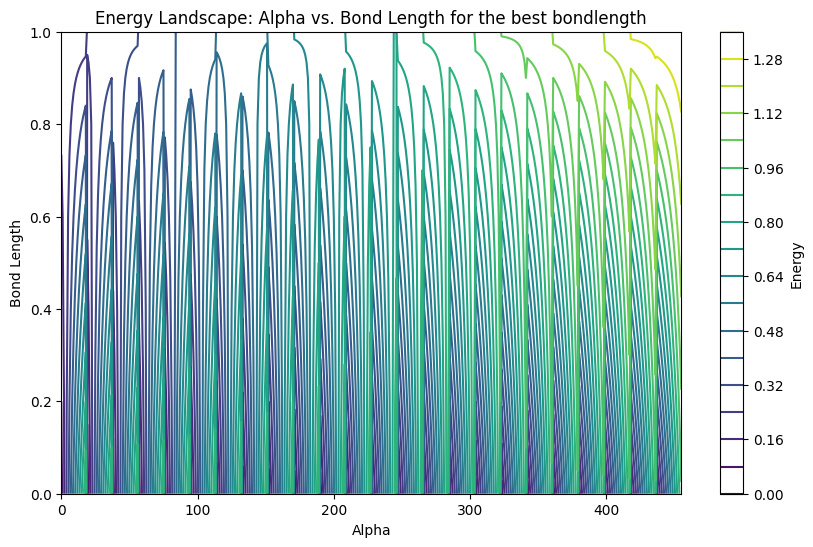

In [ ]:
bondLengths = optimizeList[:, 0]
alphas = optimizeList[:, 1]
energies = optimizeList[:, 2]
errors = optimizeList[:, 3]

# energies_reshaped = energies.reshape(len(bondLengths), len(alphas))
# errors_reshaped = errors.reshape(len(bondLengths), len(alphas))

plt.figure(figsize=(10, 6))
contour = plt.contour([alphas,  bondLengths], energies, levels=20, cmap='viridis')
plt.colorbar(label='Energy')
plt.xlabel('Alpha')
plt.ylabel('Bond Length')
plt.title('Energy Landscape: Alpha vs. Bond Length for the best bondlength')
plt.savefig('energy_landscape.jpg', format='jpg', dpi=300)

## C. Jastrow Factors

So far, we've run into two basic problems. The first is that the variance of our wavefunction is very large. Secondly, it doesn't seem to bind the Hydrogen molecule. We will try to fix this in this section. (These are correlated problems. A high variance is a signature of a bad wavefunction). Let's try to understand then why we get a high variance (and spiky behavior).

There's a high symmetry in our wavefunction so we can examine some of it without a lot of work. Let's look at the wavefunction as we change the electron and try to understand what's going wrong.

Let's examine what happens as we change our wavefunction. We could do this with the following code.

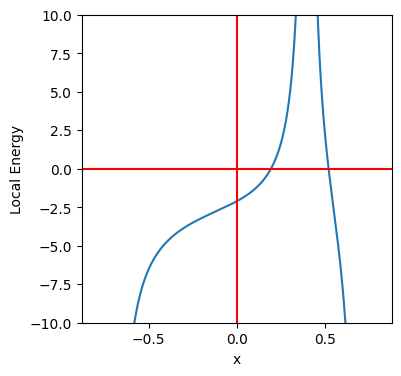

In [ ]:
wf = WaveFunctionClass()
wf.SetAlpha(0.3)
wf.SetIons(np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]]))
x=[]
y=[]
T =[]
U = []
for a in np.arange(-0.8005, 0.8005, 0.001):
    y.append(wf.LocalEnergy(np.array([[0.4,0.0,0.0],[a,0,0]])))
    T.append(wf.LaplacianPsiOverPsi(np.array([[0.4,0.0,0.0],[a,0,0]])))
    U.append(wf.PotentialPsiOverPsi(np.array([[0.4,0.0,0.0],[a,0,0]])))
    x.append(a)
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(x,y)
ax.set_ylim(-10,10)
ax.set_xlabel("x")
ax.set_ylabel("Local Energy")
ax.axhline(0,color = 'r')
ax.axvline(0, color = 'r')

Try it yourself! It seems that the local energy explodes as you approach either ion or the other electron. Try to figure out what's going wrong? (Hint: Graph the kinetic and potential pieces of the local energy separately).

Text(0.5, 1.0, 'Kinetic energy')

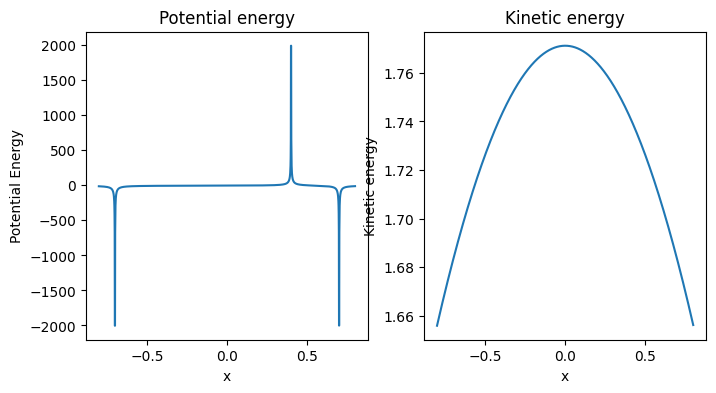

In [ ]:
fig, ax= plt.subplots(1, 2, figsize = (8, 4))
ax[0].set_xlabel('x')
ax[0].set_ylabel('Potential Energy')
ax[0].plot(x, U)
ax[0].set_title('Potential energy')
ax[1].set_ylabel('Kinetic energy')
ax[1].set_xlabel('x')
ax[1].plot(x, T)
ax[1].set_title('Kinetic energy')

Hopefully you have figure out concretely what's going wrong now. One way to describe the source of the problem is that there is no correlation between the two electrons (look back at our first wave-function. They don't see each other at all).

Let's write down a Jastrow factor that adds electron correlation. Let us define a new wavefunction,

$\Psi_2(r_1, r_2;α, β) = \Psi_1(r_1,r_2;\alpha)\exp(J_{ee} (r_1, r_2; \beta) + J_{ep}(r_1,r_2;\beta) ) $ where $J_{ee} = \frac{a_{ee}|r_1 - r_2|}{1 + b_{ee}|r_1 - r_2|}$ and $J_{ep} = - ∑_i^2∑_j^2\frac{a_{ep}|r_i - I_j|}{1 + b_{ep}|r_i - I_j|}$

, where $a_{ee}$=1/2, $a_{ep}$=1 are chosen to satisfy the electron-electron and electron-proton cusp conditions, respectively. The parameter $\beta$ gives additional freedom through the relations $b_{ee} = \sqrt{\frac{a_{ee}}{\beta}}$ and $b_{ep} = \sqrt{\frac{a_{ep}}{\beta}}$.


Write a new class WaveFunction2 that implements this wavefunction. Now, instead of having a SetAlpha function, you might want to change it to SetParams(param_list) and have it take a list of params.

### a. Old code, you can ignore this

In [ ]:
#ANSWER ME
class WaveFunction2:
  # Wave function
  def psi(self, coords):
    r1 = np.sqrt(np.sum(coords[0] ** 2))
    r2 = np.sqrt(np.sum(coords[1] ** 2))
    r_diff = np.abs(r1 - r2)

    psi_1 = np.exp(-self.alpha * (r1**2 + r2**2))

    # Electron-electron correlation term
    J_ee = self.a_ee * r_diff / (1 + self.b_ee * r_diff)

    # Electron-proton correlation term
    J_ep = 0
    ions = self.ions
    for i in range(2):  # Sum over electrons
        for j in range(2):  # Sum over ions
            ion_norm = np.linalg.norm(ions[j])
            ion_e_diff = np.abs(r1 if i == 0 else r2 - ion_norm)
            J_ep -= self.a_ep * ion_e_diff / (1 + self.b_ep * ion_e_diff)

    return psi_1 * np.exp(J_ee + J_ep)

  # Second derivative helper function
  def SecondDerivative(self, waveFunction, coords, coordinate, ptcl):
    step = 0.01
    waveFunction_og = waveFunction(coords)

    if coordinate == 'x':
        coord_new_plus = np.copy(coords)
        coord_new_plus[ptcl , 0] = coord_new_plus[ptcl , 0] + step
        waveFunction_plus = waveFunction(coord_new_plus)

        coord_new_minus = np.copy(coords)
        coord_new_minus[ptcl, 0] = coord_new_minus[ptcl, 0] - step
        waveFunction_minus = waveFunction(coord_new_minus)

    elif coordinate == 'y':
        coord_new_plus = np.copy(coords)
        coord_new_plus[ptcl, 1] = coord_new_plus[ptcl, 1] + step
        waveFunction_plus = waveFunction(coord_new_plus)

        coord_new_minus = np.copy(coords)
        coord_new_minus[ptcl, 1] = coord_new_minus[ptcl, 1] - step
        waveFunction_minus = waveFunction(coord_new_minus)

    elif coordinate == 'z':
        coord_new_plus = np.copy(coords)
        coord_new_plus[ptcl, 2] = coord_new_plus[ptcl, 2] + step
        waveFunction_plus = waveFunction(coord_new_plus)

        coord_new_minus = np.copy(coords)
        coord_new_minus[ptcl, 2] = coord_new_minus[ptcl, 2] - step
        waveFunction_minus = waveFunction(coord_new_minus)

    return (waveFunction_plus - 2 * waveFunction_og + waveFunction_minus) / step**2

  #Kinetic energy calculator
  def LaplacianPsiOverPsi(self,coords):
    ions = self.ions
    delX, delY, delZ = 0., 0., 0.
    for i in range(2):
      delX += self.SecondDerivative(self.psi, coords, 'x', i)
      delY += self.SecondDerivative(self.psi, coords, 'y', i)
      delZ += self.SecondDerivative(self.psi, coords, 'z', i)
    return - 0.5 * ((delX + delY + delZ) / self.psi(coords))

# Potential energy calculator
  def PotentialPsiOverPsi(self, coords):
      #alpha = self.alpha
      ions = self.ions
      # This returns the potential energy contribution
      # Electron-ion contributions
      ei_contrib = (np.sum(1 / np.sqrt(np.sum((coords - ions[0])**2, axis=1))) + np.sum(1 / np.sqrt(np.sum((coords - ions[1])**2, axis=1)))) * -1
      # Electron-electron contributions (include charge factor)
      ee_contrib = 1 / np.linalg.norm(coords[0] - coords[1])  # assuming charge is 1
      # Ion-ion contributions (include charge factor)
      ii_contrib = 1 / np.linalg.norm(ions[0] - ions[1])  # assuming charge is 1

      total_potential = ei_contrib + ee_contrib + ii_contrib
      return total_potential

# Total energy
  def LocalEnergy(self , coords):
    return self.LaplacianPsiOverPsi(coords) + self.PotentialPsiOverPsi(coords)

# Parameters
  def SetParams(self, params_list):
    self.alpha = params_list[0]
    self.beta = params_list[1]
    self.a_ee = 0.5
    self.a_ep = 1
    self.b_ee = np.sqrt(self.a_ee / self.beta)
    self.b_ep = np.sqrt(self.a_ep / self.beta)
    self.params = [self.alpha, self.beta, self.a_ee, self.a_ep, self.b_ee, self.b_ep]

# Ion locations
  def SetIons(self, ions):
    self.ions = ions

### b. Improved code

In [ ]:
class WaveFunction2:
    def psi(self, coords):
        r1 = np.sum(coords[0]**2)
        r2 = np.sum(coords[1]**2)
        J_ee = self.Jee(coords[0], coords[1])
        J_ep = self.Jep(coords[0], coords[1])
        return np.exp(-self.alpha * (r1 + r2) + J_ee + J_ep)

    def Jee(self, r1, r2):
        a_ee = 1 / 2
        b_ee = np.sqrt(a_ee / self.beta)
        return a_ee * np.linalg.norm(r1 - r2) / (1 + b_ee * np.linalg.norm(r1 - r2))

    def Jep(self, r1, r2):
        a_ep = 1
        b_ep = np.sqrt(a_ep / self.beta)
        ions = self.ions
        sum_Jep = 0

        for j in range(2):
            sum_Jep += a_ep * np.linalg.norm(r1 - ions[j]) / (1 + b_ep * np.linalg.norm(r1 - ions[j]))
        for j in range(2):
            sum_Jep += a_ep * np.linalg.norm(r2 - ions[j]) / (1 + b_ep * np.linalg.norm(r2 - ions[j]))
        return -sum_Jep

    def SecondDerivative(self, waveFunction, coords, coordinate, ptcl):
        step = 0.01
        waveFunctionOg = waveFunction(coords)

        coordNewPlus = np.copy(coords)
        coordNewPlus[ptcl, coordinate] += step
        waveFunctionPlus = waveFunction(coordNewPlus)

        coordNewMinus = np.copy(coords)
        coordNewMinus[ptcl, coordinate] -= step
        waveFunctionMinus = waveFunction(coordNewMinus)

        return (waveFunctionPlus - 2 * waveFunctionOg + waveFunctionMinus) / step**2

    def LaplacianPsiOverPsi(self, coords):
        delX, delY, delZ = 0., 0., 0.
        for i in range(2):
            delX += self.SecondDerivative(self.psi, coords, 0, i)
            delY += self.SecondDerivative(self.psi, coords, 1, i)
            delZ += self.SecondDerivative(self.psi, coords, 2, i)
        return -0.5 * ((delX + delY + delZ) / self.psi(coords))

    def PotentialPsiOverPsi(self, coords):
        ions = self.ions

        eiContrib=0
        eiContrib-=1.0/np.linalg.norm(coords[0]-ions[0])
        eiContrib-=1.0/np.linalg.norm(coords[0]-ions[1])
        eiContrib-=1.0/np.linalg.norm(coords[1]-ions[0])
        eiContrib-=1.0/np.linalg.norm(coords[1]-ions[1])

        eeContrib = 1 / np.linalg.norm(coords[0] - coords[1])
        iiContrib = 1 / np.linalg.norm(ions[0] - ions[1])

        totalPotential = eiContrib + eeContrib + iiContrib
        return totalPotential

    def LocalEnergy(self, coords):
        return self.LaplacianPsiOverPsi(coords) + self.PotentialPsiOverPsi(coords)

    def SetParams(self, params):
        self.alpha = params[0]
        self.beta = params[1]

    def SetIons(self, ions):
        self.ions = ions

Try again to graph the kinetic and potential pieces of the local energy. Does anything look particularly different about them? How about if you graph the complete local energy?

In [ ]:
# ANSWER ME
wf=WaveFunction2()
wf.SetParams([0.3, 0.3])
wf.SetIons(np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]]))
x=[]
y=[]
T_n  =[]
U_n = []
for a in np.arange(-0.8005,0.8005,0.005):
    y.append(wf.LocalEnergy(np.array([[0.4,0.0,0.0],[a,0,0]])))
    T_n.append(wf.LaplacianPsiOverPsi(np.array([[0.4,0.0,0.0],[a,0,0]])))
    U_n.append(wf.PotentialPsiOverPsi(np.array([[0.4,0.0,0.0],[a,0,0]])))
    x.append(a)


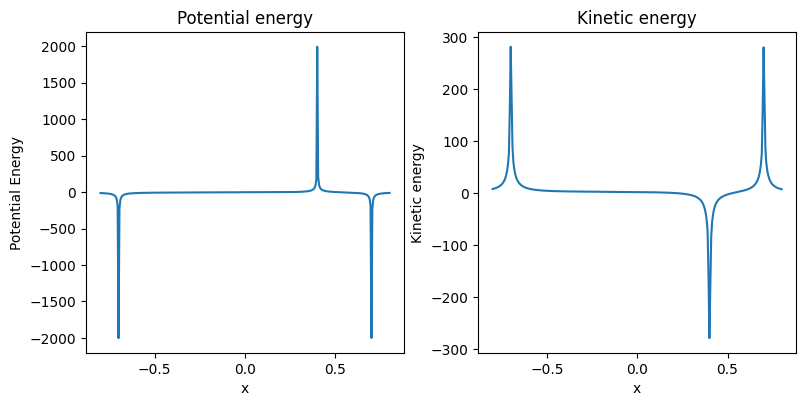

In [ ]:
fig, ax= plt.subplots(1, 2, figsize = (8, 4))
ax[0].set_xlabel('x')
ax[0].set_ylabel('Potential Energy')
ax[0].plot(x, U_n)
ax[0].set_title('Potential energy')
ax[1].set_ylabel('Kinetic energy')
ax[1].set_xlabel('x')
ax[1].plot(x, T_n)
ax[1].set_title('Kinetic energy')
fig.tight_layout(pad = 0.5)

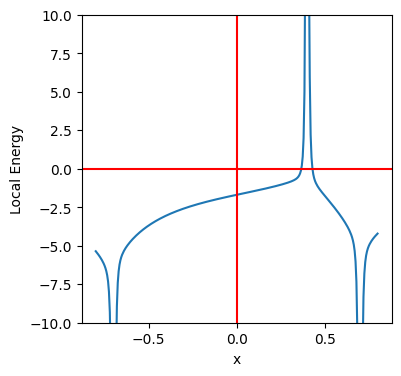

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(x,y)
ax.set_ylim(-10,10)
ax.set_xlabel("x")
ax.set_ylabel("Local Energy")
ax.axhline(0,color = 'r')
ax.axvline(0, color = 'r')

We should also be able to see how the variance differs from the previous wavefunction. Modify your VMC function to use this new wavefunction. Now graph the two different wave-function energy traces on top of each other. You should see something like the following:

In [ ]:
# ANSWER ME
def VMCJastrow(wf, WF, numSteps, printV):
  #R=np.zeros((2, 3), float)
  waveFunction = wf.psi
  movesAttempted=0.0
  movesAccepted=0.0
  electron_positions = []
  energy_list = []
  for step in range(0,numSteps):
    coordsCopy = np.copy(WF)
    R = (np.random.random((2, 3)) - 0.5) * 1.5
    for ptcl in range(0, len(R)):
      movesAttempted += 1
      # make your move for particle "ptc1"
      coordsCopy[ptcl, :] = coordsCopy[ptcl, :] + R[ptcl]
    # decide if you accepted or rejected
      if acceptanceRatio(coordsCopy, coords, ions, waveFunction) > (np.random.rand() * 1.5):
        #WF[ptcl, :] = np.copy(coordsCopy[ptcl, :])
        WF[ptcl,:] = np.copy(coordsCopy[ptcl, :])
        movesAccepted += 1
        electron_positions.append(coordsCopy[ptcl, 0])
        energy_list.append(wf.LocalEnergy(WF))
    # updated movesAttempted and movesAccepted
    # here you will compute other things in the next steps
  if printV == True:
    print ("Acceptance ratio: ", movesAccepted / movesAttempted)
  return electron_positions, energy_list

The statistics of the energies without Jastrow are given by,

In [ ]:
print('The initial coordinates of the electrons are:', coords)

The initial coordinates of the electrons are: [[ 0.67121595  0.10705308  1.14999151]
 [-0.40599275  0.08420321  0.04180503]]


In [ ]:
wf1 = WaveFunctionClass()
wf1.SetAlpha(0.3)
wf1.SetIons(np.array([[-0.7, 0, 0], [0.7, 0., 0.]]))
_, energies = VMCJastrow(wf1,coords, 20000, False)
energyArr = np.array(energies)
energyStats= stats.Stats(energyArr)

print ("Mean: ",energyStats[0])
print ("Variance: ",energyStats[1])
print ("Error: ",energyStats[2])
print ("Autocorrelation time: ",energyStats[3])

Mean:  -0.9632581441424147
Variance:  1.0251109098107087
Error:  0.016733470704473175
Autocorrelation time:  4.59438294753822


The statistics of the energies of a single Variational Monte Carlo simulation with Jastrow are given by,

In [ ]:
wf2 = WaveFunction2()
wf2.SetParams([0.3, 0.3])
wf2.SetIons(np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]]))
_, energies = VMCJastrow(wf2,coords, 20000, True)
energyArr1 = np.array(energies)
energyStats= stats.Stats(energyArr1)

print ("Mean: ",energyStats[0])
print ("Variance: ",energyStats[1])
print ("Error: ",energyStats[2])
print ("Autocorrelation time: ",energyStats[3])

Acceptance ratio:  0.407275
Mean:  -1.0643365378783798
Variance:  0.3639567014027616
Error:  0.011995404144145719
Autocorrelation time:  6.440621724937993


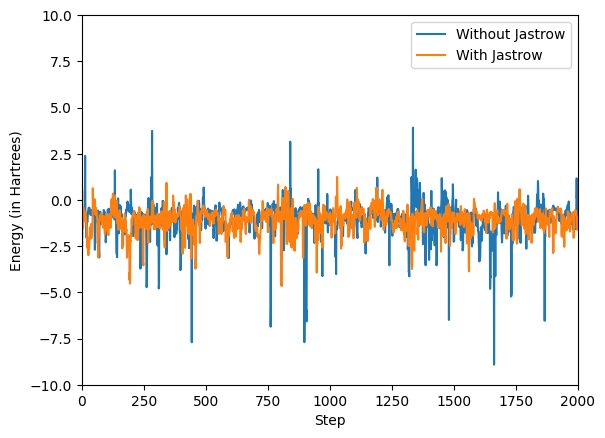

In [ ]:
plt.plot(energyArr, label = 'Without Jastrow')
plt.plot(energyArr1, label = 'With Jastrow')
plt.xlabel('Step')
plt.ylabel('Energy (in Hartrees)')
plt.xlim(0,  2000)
plt.ylim(-10, 10)
plt.legend()

The statistics of a number of Monte Carlo simulations which incorporate Jastrow factors is given by,

In [ ]:
wf1 = WaveFunctionClass()
wf1.SetAlpha(0.3)
wf1.SetIons(np.array([[-0.7, 0, 0], [0.7, 0., 0.]]))

wf2 = WaveFunction2()
wf2.SetParams([0.3, 0.3])
wf2.SetIons(np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]]))
pos = []
energiesSimJ = []
energiesSimWJ = []
for i in range(10):
  _, energyListwj = VMC(wf1, coords, 10000, False)
  electron_positions, energyListj = VMC(wf2, coords, 10000, False)
  pos.append(electron_positions)
  energiesSimJ.append(energyListj)
  energiesSimWJ.append(energyListwj)
energiesSimWJ = np.array(energiesSimWJ)
energiesSimJ = np.array(energiesSimJ)
mean_energy_array_without_jastrow = np.mean(energiesSimWJ, axis = 0)
mean_energy_array_with_jastrow = np.mean(energiesSimJ, axis = 0)

<ipython-input-48-1b4f3334ae6e>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  energiesSimWJ = np.array(energiesSimWJ)
<ipython-input-48-1b4f3334ae6e>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  energiesSimJ = np.array(energiesSimJ)


The electron density with Jastrow is given by,

<ipython-input-49-127e7e446f1c>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  positions = np.array(pos)


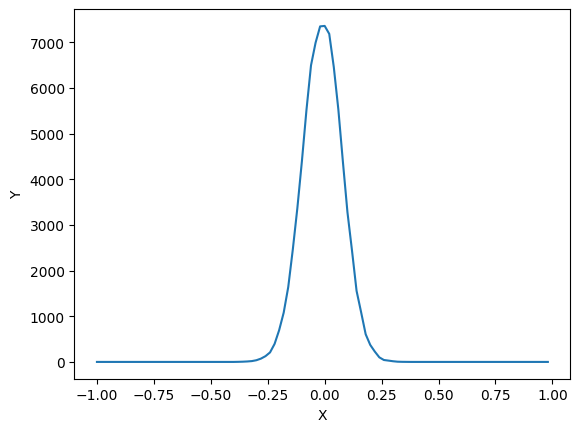

In [ ]:
densityWaveFunction = Histogram()
densityWaveFunction.Init(-1, 1, 100)


positions = np.array(pos)
mean_array = np.mean(positions, axis = 0)

mean_array = np.mean(positions, axis = 0)
for m in mean_array:
  densityWaveFunction.Add(m)
densityWaveFunction.Plot()


The statistics of multiple with Jastrow,

In [ ]:
energyStats= stats.Stats(mean_energy_array_with_jastrow)

print ("Mean: ",energyStats[0])
print ("Variance: ",energyStats[1])
print ("Error: ",energyStats[2])
print ("Autocorrelation time: ",energyStats[3])

Mean:  -0.10413365272759365
Variance:  0.0037375917941324076
Error:  0.000570223329110281
Autocorrelation time:  7.090067582949517


The statistics of multiple without Jastrow,

In [ ]:
energyStats= stats.Stats(mean_energy_array_without_jastrow)

print ("Mean: ",energyStats[0])
print ("Variance: ",energyStats[1])
print ("Error: ",energyStats[2])
print ("Autocorrelation time: ",energyStats[3])

Mean:  -0.09647666842299533
Variance:  0.016694928786837624
Error:  0.0008576285821906123
Autocorrelation time:  3.7603884677106856


Text(0.5, 1.0, 'Energy average over steps')

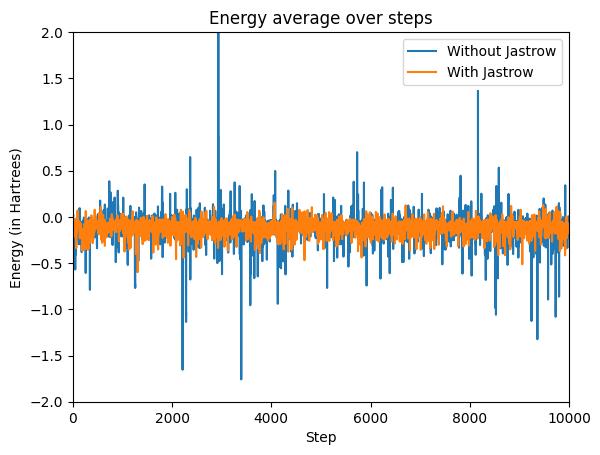

In [ ]:
plt.plot(mean_energy_array_without_jastrow, label = 'Without Jastrow')
plt.plot(mean_energy_array_with_jastrow , label = 'With Jastrow')
plt.xlabel('Step')
plt.ylabel('Energy (in Hartrees)')
plt.ylim(-2, 2)
plt.xlim(0, 10000)
#plt.ylim(-0.15, 0.15)
plt.legend(bbox_to_anchor = (1,1))
plt.title('Energy average over steps')

## D. One is easy, two is (getting hard)

Before we had a single parameter (\alpha) to optimize. Now, we need to optimize two parameters (\alpha, \beta). Whereas, one parameter was reasonably straightforward, optimizing more parameters gets tricky fast. Of course, for two parameters, you can probably suceed in generalizing the approaches we've discussed for doing a single parameter. Once you get to many more, though, this will stop workng. Why did we learn all these different ways (mentioned above) for optimizing? The techniques we learned to work with one parameter really are effective for finding the best set of paramaters in a one-dimensional search space. Therefore, we can reduce our work for more parameters by splitting it into two parts:

Finding the direction we want to be searching in.
Using the above techniques to find how far we should search in that direction
Instead of openning this bag of worms, though, let's start by doing something naive and similar to what has been described above. Let's just search over the two-dimensional space of valid parameters. To accomplish this, go ahead and implement the function:

In [ ]:
 def OptimizeJastrow(H2):
     bestAlpha=0.0
     bestBeta=0.0
     N=10 # amount of grid points you want on one side
    #  alphaMat=np.zeros((N,N),float)
    #  betaMat=np.zeros((N,N),float)
     H2.SetIons(ions)
     #EMat=np.zeros((N,N),float)
     optimizeList = []
     aMat = np.zeros((N,N), float)
     bMat = np.zeros((N, N), float)
     # set the values
     paramValues = np.arange(0.1, 1.1, 0.1)
     alphaMat, betaMat = np.meshgrid(paramValues, paramValues)
     paramsGrid = np.column_stack((alphaMat.ravel(), betaMat.ravel()))
     for i in range(len(paramsGrid)):
        params = paramsGrid[i]
        H2.SetParams(params)
        _, energyList = VMCJastrow(H2, coords, 1000, False)
        myStats = stats.Stats(np.array(energyList))
        energy = myStats[0]
        error = myStats[2]
        # aMat[i] = params[0]
        # bMat[i] = params[1]
        optimizeList.append(np.array([params,energy,error]))

     optimizeList = np.array(optimizeList)
     minEnergyIndex = np.argmin(optimizeList[:, 1])
     bestAlpha = optimizeList[minEnergyIndex, 0][0]
     bestBeta = optimizeList[minEnergyIndex, 0][1]

      # Reshape the energy values for contour plot
     EMat = optimizeList[:, 1].reshape(alphaMat.shape).astype(float)

      # Plotting the contour plot
     plt.figure(figsize=(8, 6))
     plt.contourf(alphaMat, betaMat, EMat, cmap='viridis', levels=20)
     plt.colorbar(label='Energy')
     plt.xlabel('Alpha')
     plt.ylabel('Beta')
     plt.title('Energy Contour Plot for Alpha and Beta')

      # Mark the minimum energy point with a red dot
     plt.scatter(optimizeList[minEnergyIndex, 0][0], optimizeList[minEnergyIndex, 0][1], color='red', marker='x', label='Minimum Energy')

     plt.legend()
     plt.show()
     plt.savefig('optimizeParams.jpg')
     return ((bestAlpha,bestBeta), optimizeList)

where you will build up a grid of energies for different α and β. This is slow but reasonably straigthforward. Then using the following:

<ipython-input-53-57a8734038db>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optimizeList.append(np.array([params,energy,error]))


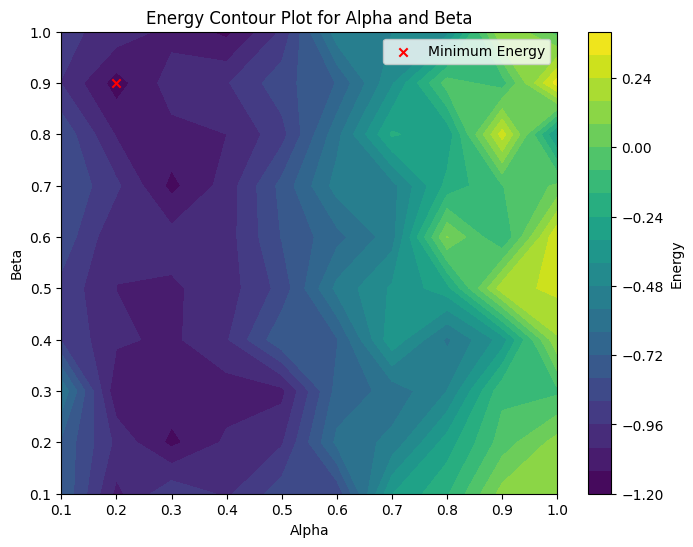

<Figure size 640x480 with 0 Axes>

In [ ]:
H2 = WaveFunction2()
H2.SetParams([0.5, 0.5])
((bestAlpha, bestBeta), optimizeList) = OptimizeJastrow(H2)

The optimized parameters are printed here,

In [ ]:
alpha = "\u03B1"
beta = "\u03B2"
print(f'The optimized value of {alpha} is:', bestAlpha)
print(f'The optimized value of {beta} is:', bestBeta)

The optimized value of α is: 0.2
The optimized value of β is: 0.9


In [ ]:
def BondLengthJastrow(wf):
  bondLengths = np.arange(0.2, 4, 0.1)
  bondList=[]
  #write stuff here
  for bondLength in (bondLengths / 2):
      wf.SetIons(np.array([[-bondLength, 0., 0.], [bondLength, 0., 0.]]))
      _, energyList = VMC(wf, coords, 10000, False)
      myStats = stats.Stats(np.array(energyList))
      energy = myStats[0]
      error = myStats[2]
      bondList.append([bondLength * 2,energy,error])
  bondList = np.array(bondList)
  optimum_bondLength = bondList[np.argmin(bondList[:, 1]), 0]
  return (optimum_bondLength,bondList)


In [ ]:
H2 = WaveFunction2()
H2.SetParams([bestAlpha, bestBeta])
(bondLength, bondList) = BondLengthJastrow(H2)
print('The bond length of Hydrogen is:', bondLength / 2)

The bond length of Hydrogen is: 0.8000000000000002


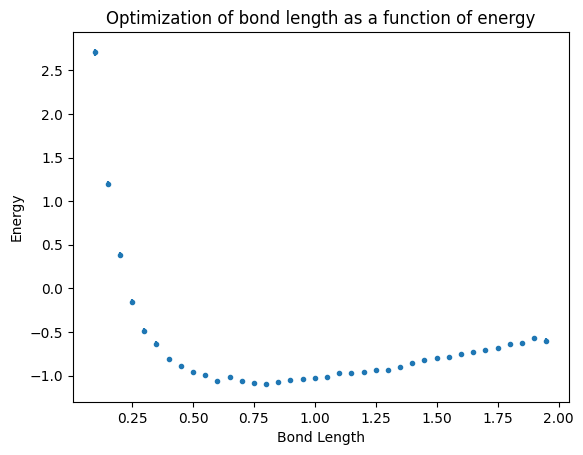

In [ ]:
plt.errorbar(bondList[:,0] / 2,(bondList[:,1]),bondList[:,2],fmt='.')
plt.xlabel('Bond Length')
plt.ylabel('Energy')
plt.title('Optimization of bond length as a function of energy')
plt.show()

Plotting the local energy for the optimized parameters,

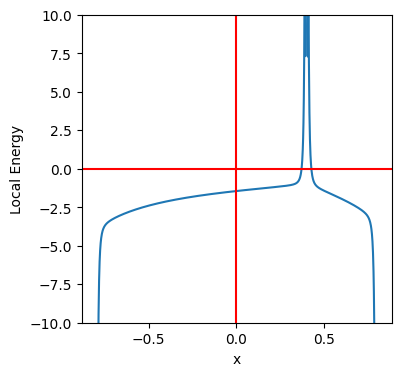

In [ ]:
wf = WaveFunction2()
wf.SetIons(np.array([[-bondLength / 2, 0., 0.], [bondLength / 2, 0., 0.]]))
wf.SetParams([bestAlpha, bestBeta])
x=[]
y=[]
T =[]
U = []
for a in np.arange(- 0.8005, 0.805, 0.001):
    y.append(wf.LocalEnergy(np.array([[0.4,0.0,0.0],[a,0,0]])))
    T.append(wf.LaplacianPsiOverPsi(np.array([[0.4,0.0,0.0],[a,0,0]])))
    U.append(wf.PotentialPsiOverPsi(np.array([[0.4,0.0,0.0],[a,0,0]])))
    x.append(a)
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(x,y)
ax.set_ylim(-10,10)
ax.set_xlabel("x")
ax.set_ylabel("Local Energy")
ax.axhline(0,color = 'r')
ax.axvline(0, color = 'r')

Again, at each step solve for the optimum parameters alpha and beta and then calculate the bond length at these parameters. You should discover with this improved wavefunction, the hydrogen molecule actually bonds!


We have hence simulated a hydrogen molecule using a Variational Monte Carlo, there can be continuing effort in the same activity, trying to simulate He4 and other molecules like water $H_2O, CH_4$ etc. Variational Monte Carlo is an extremely powerful tool to understand the structures of molecules and materials. Other than Material Science, Variational Monte Carlo can be used in any place where we need to evaluate integral based acceptances in Monte Carlo simulations which quite frequently happens in natural sciences.